# Analysis

Train the various algorithms and show your results. 

You must plot the reward obtained by your agent per step and the total regret accumulated so far.

This one is an open ended assignment, so feel free to play around. Extra credit for more beautiful plots (you can check out Seaborn). 

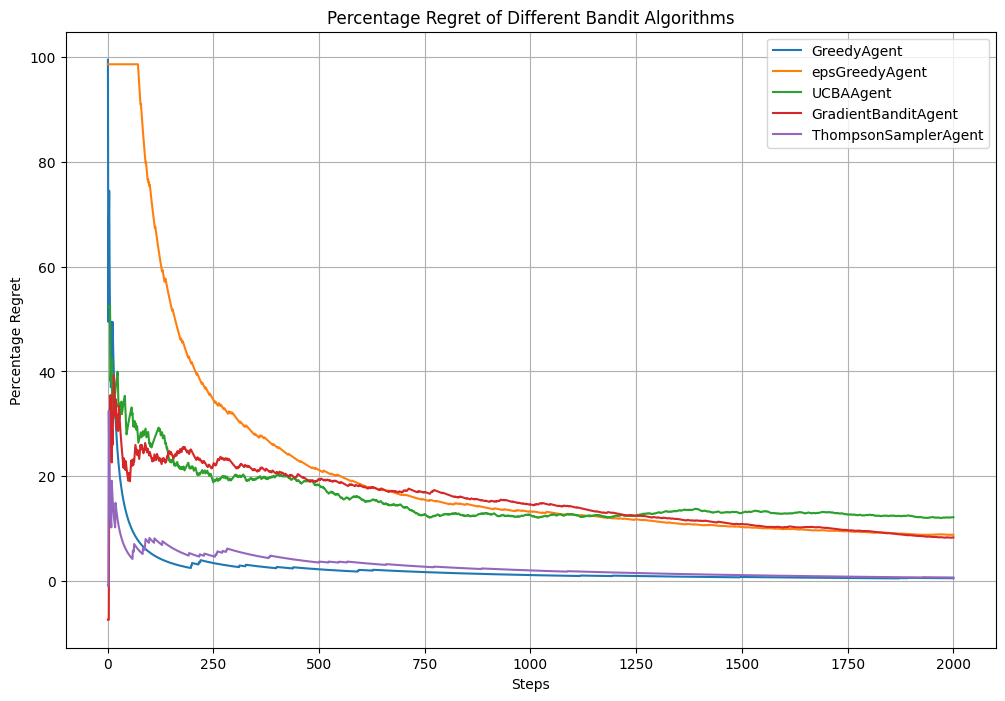

In [2]:
# main.py

import numpy as np
import matplotlib.pyplot as plt
from bandits import Bandit
from agents import *

def train_agents(agents, num_steps):
    percentage_regrets = {agent: [] for agent in agents}
    
    for step in range(1, num_steps + 1):
        for agent in agents:
            agent.act()
            cumulative_regret = agent.bandit.get_regret()
            percentage_regret = cumulative_regret*100 / step
            percentage_regrets[agent].append(percentage_regret)
    
    return percentage_regrets

def plot_percentage_regret(percentage_regrets, num_steps):
    plt.figure(figsize=(12, 8))
    for agent, percentage_regret in percentage_regrets.items():
        plt.plot(range(1, num_steps + 1), percentage_regret, label=type(agent).__name__)
    
    plt.xlabel('Steps')
    plt.ylabel('Percentage Regret')
    plt.title('Percentage Regret of Different Bandit Algorithms')
    plt.legend()
    
    # Set y-axis ticks for better resolution
    #plt.yticks(np.arange(0, max(max(regret) for regret in percentage_regrets.values()) + 0.01, 0.01))
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    num_arms = 10
    num_steps = 2000

    agents = [
        GreedyAgent(Bandit(num_arms, "Bernoulli"), initialQ=1.5),
        epsGreedyAgent(Bandit(num_arms, "Bernoulli"), epsilon=0.1),
        UCBAAgent(Bandit(num_arms, "Bernoulli"), c=1.5),
        GradientBanditAgent(Bandit(num_arms, "Bernoulli"), alpha=0.1),
        ThompsonSamplerAgent(Bandit(num_arms, "Bernoulli"))
        #GreedyAgent(Bandit(num_arms, "Bernoulli"), initialQ=0)
    ]

    percentage_regrets = train_agents(agents, num_steps)
    plot_percentage_regret(percentage_regrets, num_steps)
